<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/PulsoUnitario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pulso unitario

$f(x)=\left\{\begin{matrix}
1  \hspace{0.2cm} si \hspace{0.2cm} -1\leq x\leq1 \\ 0  \hspace{0.2cm} en \hspace{0.2cm} otro \hspace{0.2cm} caso
\end{matrix}\right.$

$a)$ Grafique esta función

$b)$ Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.

$c)$ Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: $a= 8$, $16$ y $32$ e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso $b)$.

Para el inciso $a)$

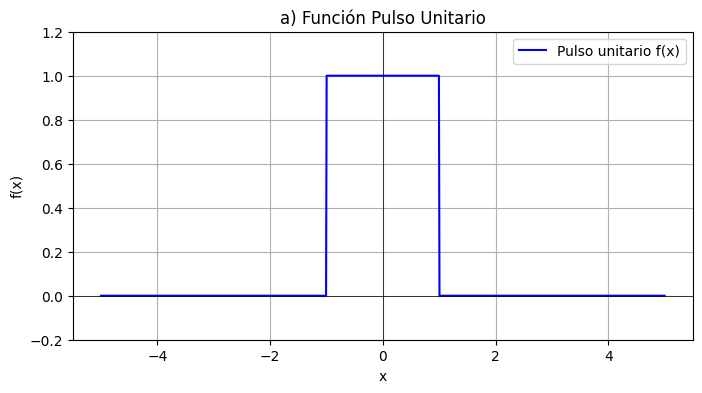

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)

f = np.where(np.abs(x) <= 1, 1, 0)

plt.figure(figsize=(8, 4))
plt.plot(x, f, label='Pulso unitario f(x)', color='blue')
plt.title('a) Función Pulso Unitario')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.ylim(-0.2, 1.2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


Para el inciso $b)$ al calcular la integral de Fourier para $f(x)$


$f(x)= \int_{0}^{∞}[A(w)cos(wx)+B(w)sen(wx)]dx$

Obtenemos

$A(w)=\frac{2sen(w)}{\pi w}$

$B(w)=0$

Entonces la integral

$f(x)= \int_{0}^{∞}\frac{2sen(w)}{\pi w}cos(wx)dx$

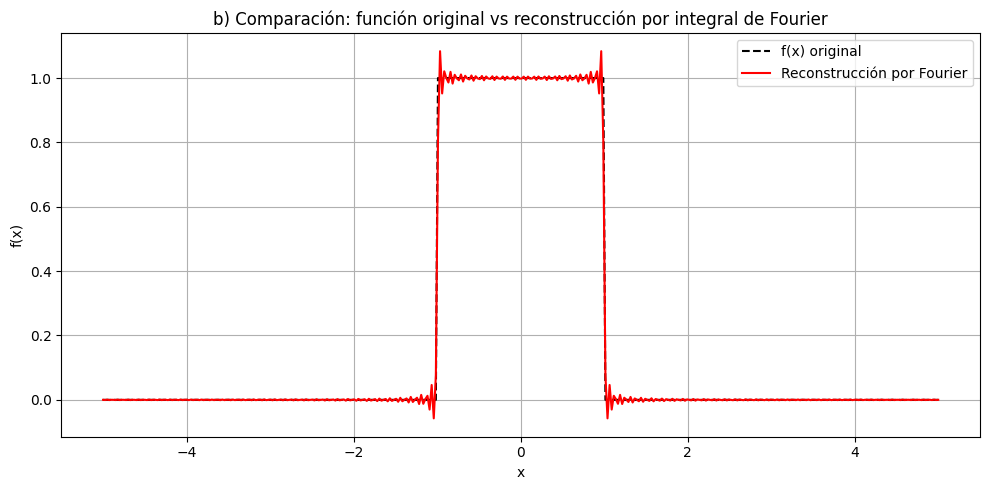

In [11]:
from scipy.integrate import quad
import contextlib
import os
import sys

x, w = sp.symbols('x w', real=True)
f = sp.Piecewise((1, sp.And(x >= -1, x <= 1)), (0, True))
F_w = sp.simplify(sp.integrate(f * sp.exp(-sp.I * w * x), (x, -sp.oo, sp.oo)))

@contextlib.contextmanager
def suppress_stderr():
    with open(os.devnull, 'w') as devnull:
        old_stderr = sys.stderr
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stderr = old_stderr

def f_reconstruida(x_val):
    integrand = lambda w: 2 * np.sinc(w / np.pi) * np.cos(w * x_val)
    with suppress_stderr():
        integral, _ = quad(integrand, -100, 100, limit=100)
    return integral / (2 * np.pi)

x_vals = np.linspace(-5, 5, 400)
f_original_vals = np.where(np.abs(x_vals) <= 1, 1, 0)
f_recon_vals = np.array([f_reconstruida(xi) for xi in x_vals])

plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_original_vals, label='f(x) original', linestyle='--', color='black')
plt.plot(x_vals, f_recon_vals, label='Reconstrucción por Fourier', color='red')
plt.title("b) Comparación: función original vs reconstrucción por integral de Fourier")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Para el inciso $c)$

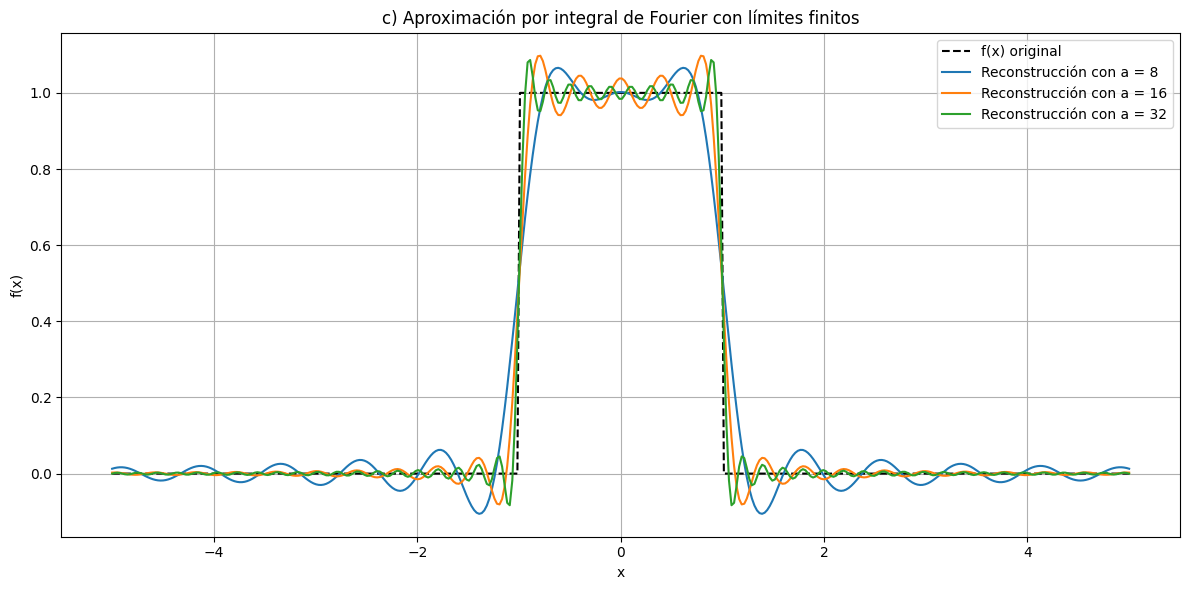

In [12]:
@contextlib.contextmanager
def suppress_stderr():
    with open(os.devnull, 'w') as devnull:
        old_stderr = sys.stderr
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stderr = old_stderr

def f_aprox(x_val, a):
    integrand = lambda w: 2 * np.sinc(w / np.pi) * np.cos(w * x_val)
    with suppress_stderr():
        integral, _ = quad(integrand, -a, a, limit=100)
    return integral / (2 * np.pi)

x_vals = np.linspace(-5, 5, 400)
f_original_vals = np.where(np.abs(x_vals) <= 1, 1, 0)

a_values = [8, 16, 32]
f_approx_vals = {a: np.array([f_aprox(xi, a) for xi in x_vals]) for a in a_values}

plt.figure(figsize=(12, 6))
plt.plot(x_vals, f_original_vals, '--', color='black', label='f(x) original')

for a in a_values:
    plt.plot(x_vals, f_approx_vals[a], label=f'Reconstrucción con a = {a}')

plt.title("c) Aproximación por integral de Fourier con límites finitos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
